## Stats701-001 Homework 6: `numpy` and `matplotlib`
### Taylor Spooner
#### spoonert@umich.edu

**Collaboration**:

**Time**: 

### Problem 1: Warmup: plotting CLTs

#### Choose four different probability distributions with mean 0 and variance 1.  

The four distributions that I am going to chose are:
- $\sqrt{12}(\text{Unif}(0,1)-1/2)$  
- $\text{Exponential}(1) - 1$
- $(1/2)(\text{Gamma}(\alpha=2, \beta=1) - 2)$
- $(\text{Bern(.5) - .5})/\sqrt{.5(1-.5)}$

In [128]:
from scipy.stats import uniform, expon, gamma, bernoulli, norm
import numpy as np
import matplotlib.pyplot as plt
import math

1. **Pick a reasonably large value of $n$. Make a plot with four subplots, one for each of the four distributions. For each subplot, use Numpy/Scipy to generate $m=1000$ independent draws of $\sqrt{n}(S_n - \mu)$ from that subplot's distribution and show in that subplot a (normalized) histogram of the empirical distribution of $\sqrt{n}(S_n - \mu)$.**
2. **Title each of your subplots with the name of the distribution you used for that subplot. Make sure that all four of your plots have the same scales on their x- and y-axes.**
3. **Add to each subplot a solid line indicating the density of the standard normal, so that we can see how “normal” the empirical distribution looks.**
4. ** Do all four of your plots look equally "normal"? Note that it may help to try a few different values of $n$ to explore differences between the plots, depending on which four distributions you picked.**

In [149]:
n = 30
m = 1000
# Uniform(0,1)
un = [math.sqrt(n)*np.mean(math.sqrt(12)*(uniform.rvs(size=n) - 1/2)) for x in range(m)]

In [150]:
# Exponential(1)
ex = [math.sqrt(n)*np.mean(expon.rvs(size=n)-1) for x in range(m)]

In [151]:
# Gamma(2,1)
gam = [math.sqrt(n)*np.mean((1/2)*(gamma.rvs(a=2, size=n)-2)) for x in range(m)]

In [152]:
# Bernoulli(.5)
bern = [math.sqrt(n)*np.mean((bernoulli.rvs(p=.5, size=n)-.5)/math.sqrt(.5**2)) for x in range(m)]

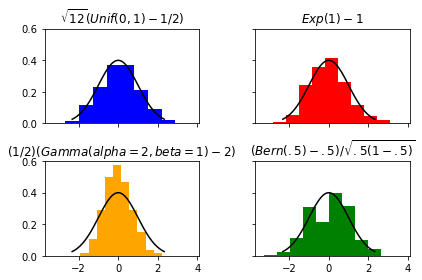

In [153]:
x = np.linspace(norm.ppf(0.01), norm.ppf(0.99), 100)
rv = norm()
fig, ((ax1,ax2), (ax3,ax4)) = plt.subplots(2,2, sharex = 'all', sharey = 'all')
ax1.hist(un, normed=True, color='blue')
ax1.plot(x, rv.pdf(x), color='black')
ax1.set_title("$\sqrt{12}(Unif(0,1)-1/2)$")
ax2.hist(ex, normed=True, color='red')
ax2.plot(x, rv.pdf(x), color='black')
ax2.set_title("$Exp(1) - 1$")
ax3.hist(gam, normed=True, color='orange')
ax3.plot(x, rv.pdf(x), color='black')
ax3.set_title("$(1/2)(Gamma(alpha=2, beta=1) - 2)$")
ax4.hist(bern, normed=True, color='green')
ax4.plot(x, rv.pdf(x), color='black')
ax4.set_title("$(Bern(.5) - .5)/\sqrt{.5(1-.5)}$")
plt.tight_layout()
plt.show()